<a href="https://colab.research.google.com/github/windyday0622/windyday/blob/main/AI%20Agent%20%EC%96%B8%EC%96%B4%EB%AA%A8%EB%8D%B8%20%ED%95%99%EC%8A%B5%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%83%9D%EC%84%B1%20%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%A8%20/1_%ED%95%9C%EA%B5%AD%EC%96%B4_%EB%AC%B8%EC%84%9C_%EC%A0%95%EC%A0%9C_%EB%B0%8F_%EB%A6%AC%EB%B7%B0_%ED%94%84%EB%A1%9C%EC%84%B8%EC%8A%A4_%EC%9E%90%EB%8F%99%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 데이터 수집
목표: 웹에서 한국어 문서를 수집.

도구 및 라이브러리:
requests: 웹 페이지 요청.
BeautifulSoup: HTML 파싱.
newspaper3k: 뉴스 기사 수집에 유용.
selenium: 동적 웹사이트 크롤링.

In [14]:
import requests
from bs4 import BeautifulSoup

# 웹 크롤러 (뉴스 기사 크롤링)
def fetch_news_articles(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    articles = []
    for article in soup.find_all('div', class_='article-body'):
        articles.append(article.get_text(strip=True))
    return articles

# 사용
news_url = "https://www.pinpointnews.co.kr/news/articleView.html?idxno=262660"
data = fetch_news_articles(news_url)
print(data[:5])  # 수집된 뉴스 기사 출력

['텔코 LLM 개념도. 사진=SKT[핀포인트뉴스 임해정 기자]\xa0SK텔레콤이 5G 요금제, 공시지원금 등 국내 통신 관련 용어와 통신사 내부 지침을 학습한 \'텔코LLM\'을 6월 중 개발 완료할 예정이다.SK텔레콤은 30일 서울 중구 SKT 타워에서 취재진 대상 텔코LLM 설명회를 열어 이같이 밝혔다.LLM(거대 언어모델)은 방대한 양의 문장 데이터를 학습해 자연어 처리 작업을 수행하는 데 필요한 지식을 획득한 딥러닝 모델이다.텔코LLM은 잘 알려진 \'챗-GPT\', \'클로드\' 같은 범용 LLM을 통신업에 특화해 발전시킨 모델로, SKT가 오픈AI, 앤트로픽 등과 협력해 개발을 진행하고 있다.개발이 완료되면 한국어 버전 서비스를 먼저 시작하고, 해외 기업들과 글로벌 버전 개발에 대한 합의를 완료하면 글로벌 버전도 출시할 예정이다.에릭 데이비스 SKT AI 기술 협력 담당은 이날 발표에서 "1개의 범용 LLM으로 통신사가 하려는 다양한 서비스와 문제를 해결하는 일은 쉽지 않다"며 "통신 데이터와 도메인 노하우에 맞춰 조정하는 미세 조정(파인 튜닝)과 모델 평가(벤치마킹) 과정을 거쳐 다양한 텔코LLM을 만들고 이를 상황에 맞게 골라 쓸 수 있도록 하는 것이 SKT의 멀티LLM 전략"이라고 말했다.즉 SKT의 LLM인 에이닷엑스(A.X), 오픈AI의 GPT-4, 앤트로픽의 클로드 같은 범용 LLM에 통신 관련 한국어 데이터를 학습시켜 AI 고객센터(AICC), 유통망, 네트워크 운용, 사내 업무 등에 다양하게 쓸 수 있게 한다는 게 이 회사의 목표다.SKT는 우선 LLM에 통신 관련 데이터를 학습시킨 다음, 문의에 유용한 답변을 하는지, 문맥을 이해했는지 등을 상담사가 평가한 뒤, 부족하다는 평가를 받은 부분과 관련 데이터를 추가 학습시키는 과정을 반복시켜 LLM을 고도화했다.SKT는 텔코LLM을 활용하면 다양한 통신사 업무에 걸리는 시간을 줄일 것으로 기대했다.고객센터 분야에선 상담 소요 시간을 대폭 단축한다.기존에는 고객센터에서 상담사가 고객 문의

2. 중복 문서 제거
목표: 해시 기반 비교를 통해 중복된 문서 필터링.

도구 및 라이브러리:
hashlib: 문자열의 해시값 생성.
set: 중복 제거를 위한 효율적인 데이터 구조.

In [5]:
import hashlib

def remove_duplicates(documents):
    unique_docs = set()
    filtered_docs = []
    for doc in documents:
        doc_hash = hashlib.md5(doc.encode('utf-8')).hexdigest()
        if doc_hash not in unique_docs:
            unique_docs.add(doc_hash)
            filtered_docs.append(doc)
    return filtered_docs

# 중복 제거 사용 예시
unique_data = remove_duplicates(data)
print("중복 제거 후 데이터:", unique_data[:5])

중복 제거 후 데이터: ['텔코 LLM 개념도. 사진=SKT[핀포인트뉴스 임해정 기자]\xa0SK텔레콤이 5G 요금제, 공시지원금 등 국내 통신 관련 용어와 통신사 내부 지침을 학습한 \'텔코LLM\'을 6월 중 개발 완료할 예정이다.SK텔레콤은 30일 서울 중구 SKT 타워에서 취재진 대상 텔코LLM 설명회를 열어 이같이 밝혔다.LLM(거대 언어모델)은 방대한 양의 문장 데이터를 학습해 자연어 처리 작업을 수행하는 데 필요한 지식을 획득한 딥러닝 모델이다.텔코LLM은 잘 알려진 \'챗-GPT\', \'클로드\' 같은 범용 LLM을 통신업에 특화해 발전시킨 모델로, SKT가 오픈AI, 앤트로픽 등과 협력해 개발을 진행하고 있다.개발이 완료되면 한국어 버전 서비스를 먼저 시작하고, 해외 기업들과 글로벌 버전 개발에 대한 합의를 완료하면 글로벌 버전도 출시할 예정이다.에릭 데이비스 SKT AI 기술 협력 담당은 이날 발표에서 "1개의 범용 LLM으로 통신사가 하려는 다양한 서비스와 문제를 해결하는 일은 쉽지 않다"며 "통신 데이터와 도메인 노하우에 맞춰 조정하는 미세 조정(파인 튜닝)과 모델 평가(벤치마킹) 과정을 거쳐 다양한 텔코LLM을 만들고 이를 상황에 맞게 골라 쓸 수 있도록 하는 것이 SKT의 멀티LLM 전략"이라고 말했다.즉 SKT의 LLM인 에이닷엑스(A.X), 오픈AI의 GPT-4, 앤트로픽의 클로드 같은 범용 LLM에 통신 관련 한국어 데이터를 학습시켜 AI 고객센터(AICC), 유통망, 네트워크 운용, 사내 업무 등에 다양하게 쓸 수 있게 한다는 게 이 회사의 목표다.SKT는 우선 LLM에 통신 관련 데이터를 학습시킨 다음, 문의에 유용한 답변을 하는지, 문맥을 이해했는지 등을 상담사가 평가한 뒤, 부족하다는 평가를 받은 부분과 관련 데이터를 추가 학습시키는 과정을 반복시켜 LLM을 고도화했다.SKT는 텔코LLM을 활용하면 다양한 통신사 업무에 걸리는 시간을 줄일 것으로 기대했다.고객센터 분야에선 상담 소요 시간을 대폭 단축한다.기존에는 고객센터

3. 불필요한 텍스트 제거
목표: 광고, 비속어, 불완전 문장을 정규 표현식으로 제거.

도구 및 라이브러리:
re: 정규 표현식 처리.

In [19]:
import re

def clean_text(documents):
    cleaned_docs = []
    for doc in documents:
        # 광고 제거
        doc = re.sub(r'광고[^\n]*', '', doc)
        # 비속어 제거 (예: "비속어1", "비속어2")
        doc = re.sub(r'비속어1|비속어2', '', doc)
        cleaned_docs.append(doc.strip())
    return cleaned_docs

# 텍스트 정제 사용 예시
cleaned_data = clean_text(unique_data)
print("정제 후 데이터:", cleaned_data[:5])


정제 후 데이터: ['텔코 LLM 개념도. 사진=SKT[핀포인트뉴스 임해정 기자]\xa0SK텔레콤이 5G 요금제, 공시지원금 등 국내 통신 관련 용어와 통신사 내부 지침을 학습한 \'텔코LLM\'을 6월 중 개발 완료할 예정이다.SK텔레콤은 30일 서울 중구 SKT 타워에서 취재진 대상 텔코LLM 설명회를 열어 이같이 밝혔다.LLM(거대 언어모델)은 방대한 양의 문장 데이터를 학습해 자연어 처리 작업을 수행하는 데 필요한 지식을 획득한 딥러닝 모델이다.텔코LLM은 잘 알려진 \'챗-GPT\', \'클로드\' 같은 범용 LLM을 통신업에 특화해 발전시킨 모델로, SKT가 오픈AI, 앤트로픽 등과 협력해 개발을 진행하고 있다.개발이 완료되면 한국어 버전 서비스를 먼저 시작하고, 해외 기업들과 글로벌 버전 개발에 대한 합의를 완료하면 글로벌 버전도 출시할 예정이다.에릭 데이비스 SKT AI 기술 협력 담당은 이날 발표에서 "1개의 범용 LLM으로 통신사가 하려는 다양한 서비스와 문제를 해결하는 일은 쉽지 않다"며 "통신 데이터와 도메인 노하우에 맞춰 조정하는 미세 조정(파인 튜닝)과 모델 평가(벤치마킹) 과정을 거쳐 다양한 텔코LLM을 만들고 이를 상황에 맞게 골라 쓸 수 있도록 하는 것이 SKT의 멀티LLM 전략"이라고 말했다.즉 SKT의 LLM인 에이닷엑스(A.X), 오픈AI의 GPT-4, 앤트로픽의 클로드 같은 범용 LLM에 통신 관련 한국어 데이터를 학습시켜 AI 고객센터(AICC), 유통망, 네트워크 운용, 사내 업무 등에 다양하게 쓸 수 있게 한다는 게 이 회사의 목표다.SKT는 우선 LLM에 통신 관련 데이터를 학습시킨 다음, 문의에 유용한 답변을 하는지, 문맥을 이해했는지 등을 상담사가 평가한 뒤, 부족하다는 평가를 받은 부분과 관련 데이터를 추가 학습시키는 과정을 반복시켜 LLM을 고도화했다.SKT는 텔코LLM을 활용하면 다양한 통신사 업무에 걸리는 시간을 줄일 것으로 기대했다.고객센터 분야에선 상담 소요 시간을 대폭 단축한다.기존에는 고객센터에서 

4. 샘플링 및 리뷰
정제된 데이터에서 샘플을 추출하여 리뷰 프로세스를 돕습니다.

In [20]:
import random

def sample_documents(documents, sample_size=5):
    return random.sample(documents, min(sample_size, len(documents)))

# 샘플링 사용 예시
sampled_data = sample_documents(cleaned_data)
print("샘플링된 데이터:", sampled_data)

샘플링된 데이터: ['텔코 LLM 개념도. 사진=SKT[핀포인트뉴스 임해정 기자]\xa0SK텔레콤이 5G 요금제, 공시지원금 등 국내 통신 관련 용어와 통신사 내부 지침을 학습한 \'텔코LLM\'을 6월 중 개발 완료할 예정이다.SK텔레콤은 30일 서울 중구 SKT 타워에서 취재진 대상 텔코LLM 설명회를 열어 이같이 밝혔다.LLM(거대 언어모델)은 방대한 양의 문장 데이터를 학습해 자연어 처리 작업을 수행하는 데 필요한 지식을 획득한 딥러닝 모델이다.텔코LLM은 잘 알려진 \'챗-GPT\', \'클로드\' 같은 범용 LLM을 통신업에 특화해 발전시킨 모델로, SKT가 오픈AI, 앤트로픽 등과 협력해 개발을 진행하고 있다.개발이 완료되면 한국어 버전 서비스를 먼저 시작하고, 해외 기업들과 글로벌 버전 개발에 대한 합의를 완료하면 글로벌 버전도 출시할 예정이다.에릭 데이비스 SKT AI 기술 협력 담당은 이날 발표에서 "1개의 범용 LLM으로 통신사가 하려는 다양한 서비스와 문제를 해결하는 일은 쉽지 않다"며 "통신 데이터와 도메인 노하우에 맞춰 조정하는 미세 조정(파인 튜닝)과 모델 평가(벤치마킹) 과정을 거쳐 다양한 텔코LLM을 만들고 이를 상황에 맞게 골라 쓸 수 있도록 하는 것이 SKT의 멀티LLM 전략"이라고 말했다.즉 SKT의 LLM인 에이닷엑스(A.X), 오픈AI의 GPT-4, 앤트로픽의 클로드 같은 범용 LLM에 통신 관련 한국어 데이터를 학습시켜 AI 고객센터(AICC), 유통망, 네트워크 운용, 사내 업무 등에 다양하게 쓸 수 있게 한다는 게 이 회사의 목표다.SKT는 우선 LLM에 통신 관련 데이터를 학습시킨 다음, 문의에 유용한 답변을 하는지, 문맥을 이해했는지 등을 상담사가 평가한 뒤, 부족하다는 평가를 받은 부분과 관련 데이터를 추가 학습시키는 과정을 반복시켜 LLM을 고도화했다.SKT는 텔코LLM을 활용하면 다양한 통신사 업무에 걸리는 시간을 줄일 것으로 기대했다.고객센터 분야에선 상담 소요 시간을 대폭 단축한다.기존에는 고객센터에서 

5. 품질 평가 도구 설계
중복 제거 및 정제 전후의 데이터 품질 점수를 계산합니다.

In [21]:
def evaluate_quality(original, processed):
    original_count = len(original)
    processed_count = len(processed)
    quality_score = processed_count / original_count if original_count > 0 else 0
    return quality_score

# 품질 평가 사용 예시
quality_score = evaluate_quality(data, cleaned_data)
print(f"\n품질 점수: {quality_score:.2f}")


품질 점수: 1.00


6. 결과 시각화
정제 전후의 데이터를 시각화하여 결과를 보여줍니다.

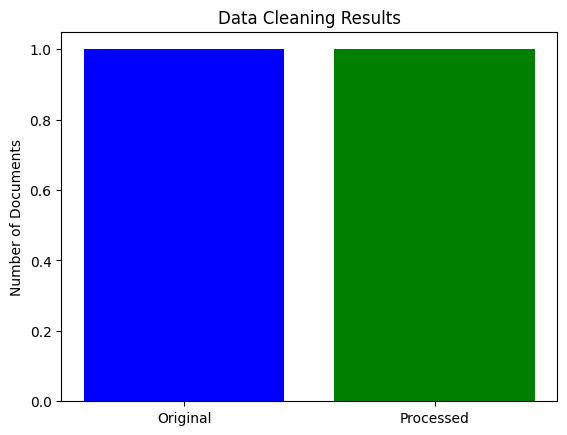

In [23]:
import matplotlib.pyplot as plt

def visualize_results(original_count, processed_count):
    labels = ['Original', 'Processed']
    counts = [original_count, processed_count]
    plt.bar(labels, counts, color=['blue', 'green'])
    plt.title("Data Cleaning Results")
    plt.ylabel("Number of Documents")
    plt.show()

# 시각화 사용
visualize_results(len(data), len(cleaned_data))